In [68]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.datasets import load_digits
from sklearn.datasets import fetch_openml
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [10]:
# Q1
mnist = fetch_openml('mnist_784')

In [71]:
x = mnist.data
y = mnist.target
X_train , X_test, Y_train, Y_test = train_test_split(mnist.data,mnist.target,test_size = 0.1)
X_train , X_test = X_train.to_numpy() , X_test.to_numpy()
Y_train  = Y_train.cat.codes
Y_train = Y_train.to_numpy()
Y_test = Y_test.cat.codes
Y_test = Y_test.to_numpy()
meanImgArray = []


In [43]:
for i in range(10):
    
    tempArray = np.vstack(np.mean(X_train[np.where(Y_train==i)],axis=0))
    meanImgArray.append(tempArray)
    tempArray = []

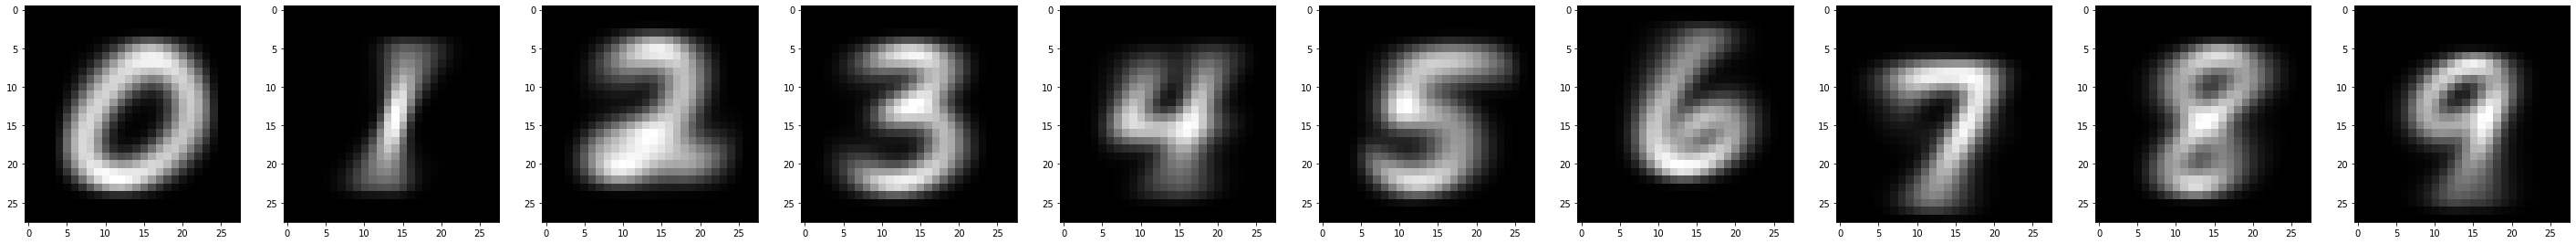

In [44]:
fig,axes=plt.subplots(1,10,figsize=[50,5])
for i in range(10):
    meanImgArray[i] = meanImgArray[i].reshape(28,28)
    axes[i].imshow(meanImgArray[i],interpolation=None,cmap='gray')

plt.show()


In [62]:
# Q2
# Binary - b/w 0 and 1

train_data = X_train[np.where((Y_train==0) | (Y_train==1) )]
train_target =Y_train[np.where((Y_train==0) | (Y_train==1))]
test_data = X_test[np.where((Y_test==0) | ( Y_test==1))]
test_target =Y_test[np.where((Y_test==0) | ( Y_test==1))]

print(train_data.shape)

(13246, 784)


In [63]:
clf = LinearDiscriminantAnalysis()
clf.fit(train_data, train_target)
pred_data = clf.predict(test_data)
print(pred_data.shape)

(1534,)


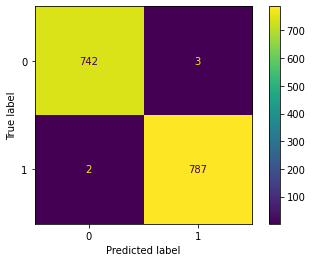

In [69]:
cm = confusion_matrix(test_target, pred_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [72]:
# Multiclass LDA

clf = LinearDiscriminantAnalysis()
clf.fit(X_train, Y_train)
pred_data = clf.predict(X_test)
print(pred_data.shape)

(7000,)


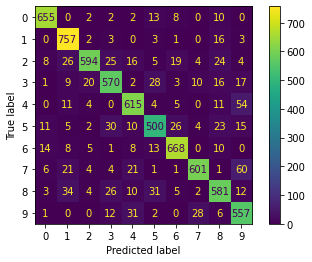

In [78]:
cm = confusion_matrix(Y_test, pred_data)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()